In [43]:
#IMPORT NECESSARY MODULES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [44]:
#LOADING THE DATA
empt=pd.read_csv("EmployeeData.csv")

In [45]:
print(empt.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [46]:
print(empt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [47]:
print(empt.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [48]:
#HANDLING NULL VALUES or DUPLICATE ROWS

print(empt.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [49]:
print(empt.duplicated().sum())

3008


In [50]:
#DROPING THE DUPLICATES
empt=empt.drop_duplicates()
print(empt.duplicated().sum())

0


In [51]:
print(len(empt))

11991


In [52]:
#DISPLAY THE MEAN SUMMARY OF EMPLOYEE COUNT (turnover vs non-turnover )
numeric_columns = empt.select_dtypes(include=['float64', 'int64'])
turnover_summary = numeric_columns.groupby('left').mean()
print(round(turnover_summary, 2))

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0                   0.67             0.72            3.79   
1                   0.44             0.72            3.88   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0                   198.94                3.26           0.17   
1                   208.16                3.88           0.05   

      promotion_last_5years  
left                         
0                      0.02  
1                      0.00  


In [53]:
#VALUE COUNTS FOR DIFFERENT FEATURES IN  THE DATASET

#value counts for 'salary'
print(empt['salary'].value_counts())

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64


In [54]:
#value counts for 'left'
print(empt['left'].value_counts())

left
0    10000
1     1991
Name: count, dtype: int64


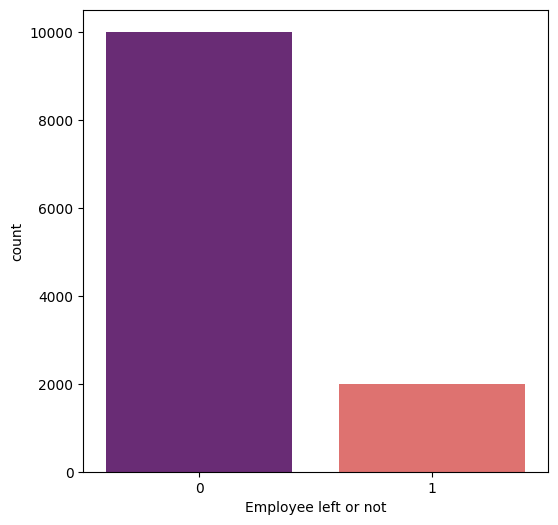

In [55]:
#PLOT FOR THE EMPLOYEE COUNT OF TURNOVER AND NON-TURNOVER

plt.figure(figsize=(6,6))
sns.countplot(x='left', data=empt, palette='magma')
plt.xlabel("Employee left or not")
plt.ylabel("count")
plt.show()


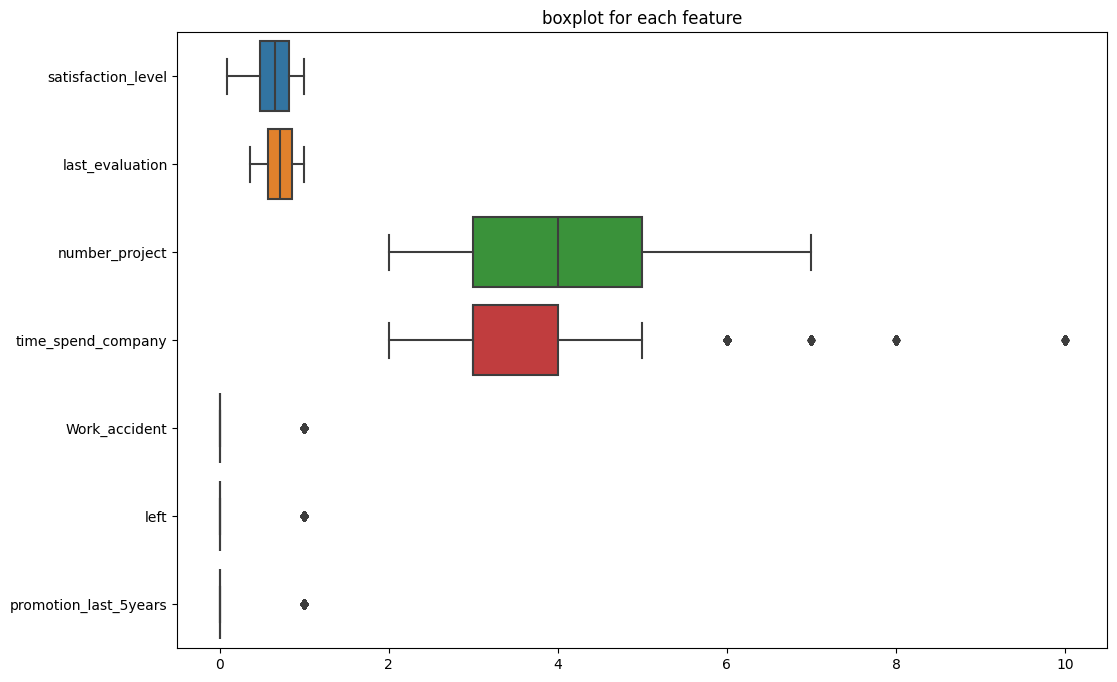

In [56]:
#CHECK FOR OUTLIERS
plt.figure(figsize=(12,8))
df=empt.drop(['average_montly_hours'],axis=1)
sns.boxplot(data=df, orient='h')
plt.title("boxplot for each feature")
plt.show()

In [57]:
#REMOVING THE OUTLIERS

outliers_columns=['time_spend_company']
for col in outliers_columns:
 if empt[col].dtype in ["int64","float64"]:
  q1= empt[col].quantile(0.25)
  q3= empt[col].quantile(0.75)
  iqr = q3 - q1
  low_bound = q1 - 1.5 * iqr
  up_bound = q3 + 1.5 * iqr
  empt= empt[
  (empt[col] >= low_bound) & (empt[col] <= up_bound)
  ]

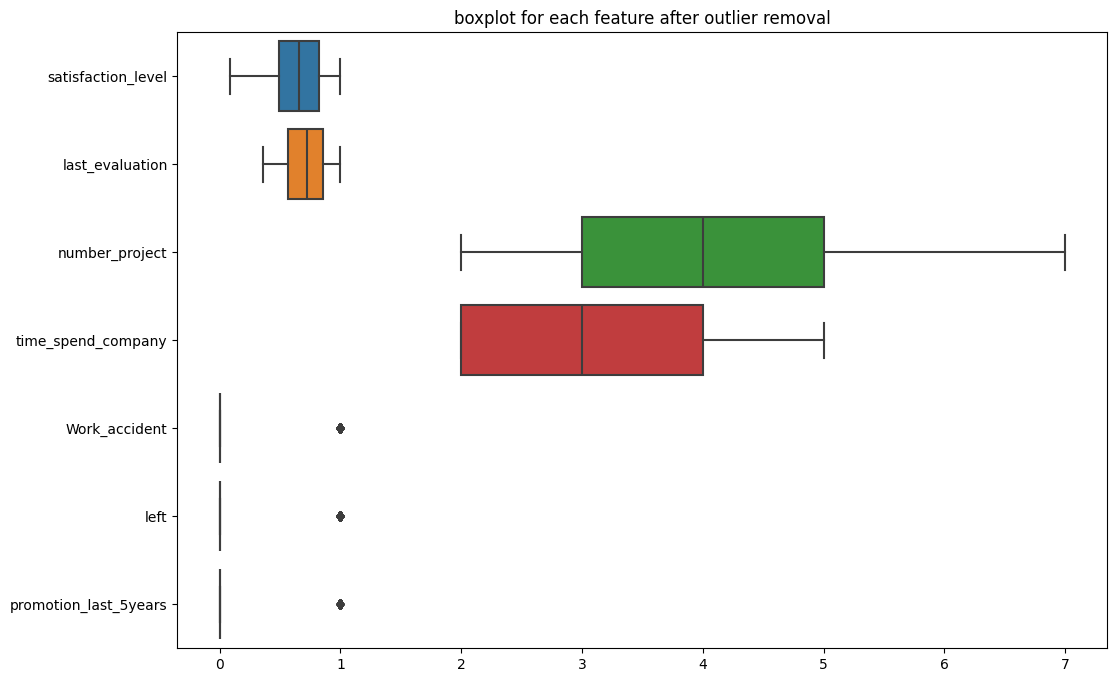

In [58]:
#CHECK FOR OUTLIERS

plt.figure(figsize=(12,8))
df=empt.drop(['average_montly_hours'],axis=1)
sns.boxplot(data=df, orient='h')
plt.title("boxplot for each feature after outlier removal")
plt.show()

In [59]:
#NUMBER OF ROWS

print(len(empt))

11167


In [60]:
#PERFORMING ONE HOT ENCODING FOR CATEGORICAL VARIABLES

obj_col= empt.select_dtypes(include=["object"]).columns
empt1= pd.get_dummies(empt, columns=obj_col, dtype='int64')
empt1=empt1.replace({True : 1, False: 0})
print(empt1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_project         11167 non-null  int64  
 3   average_montly_hours   11167 non-null  int64  
 4   time_spend_company     11167 non-null  int64  
 5   Work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   sales_IT               11167 non-null  int64  
 9   sales_RandD            11167 non-null  int64  
 10  sales_accounting       11167 non-null  int64  
 11  sales_hr               11167 non-null  int64  
 12  sales_management       11167 non-null  int64  
 13  sales_marketing        11167 non-null  int64  
 14  sales_product_mng      11167 non-null  int64  
 15  sales_s

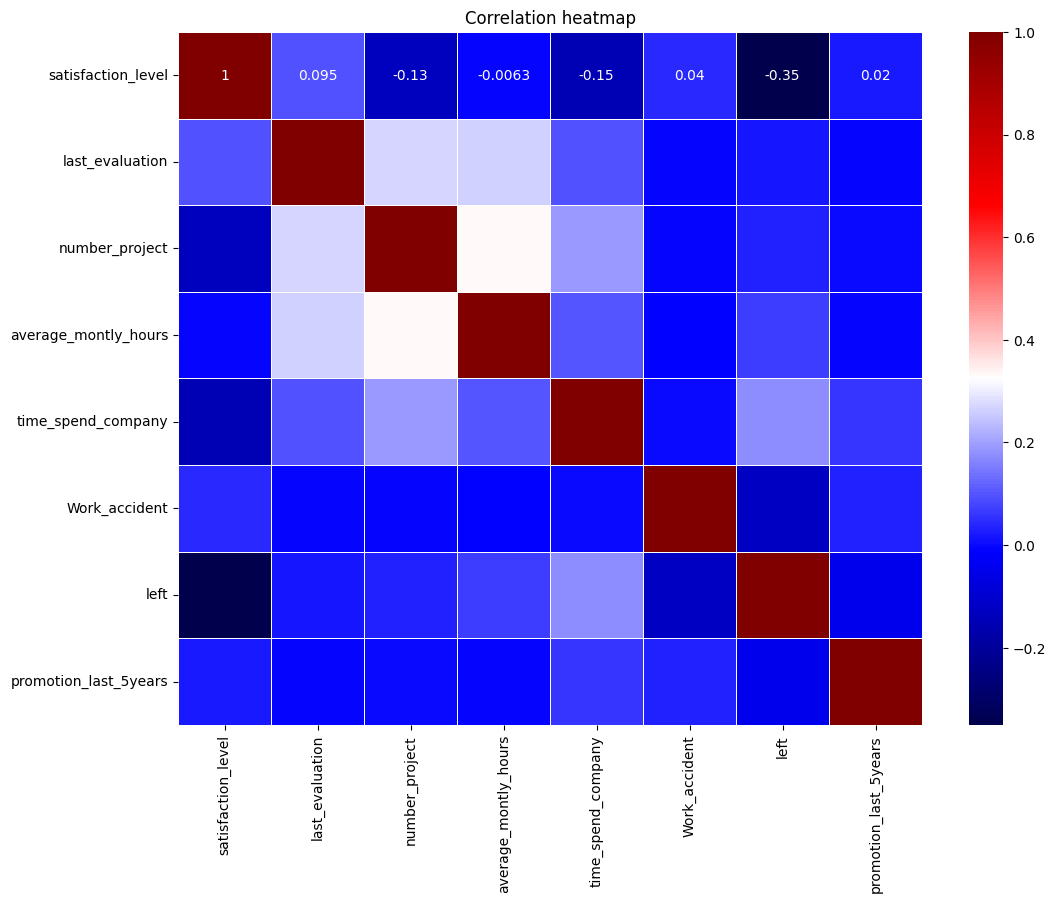

In [61]:
#CORRELATION AMONG THE FEATURES

plt.figure(figsize=(12,9))
sns.heatmap(numeric_columns.corr(), cmap="seismic", linewidths=0.5, annot=True)
plt.title("Correlation heatmap")
plt.show()

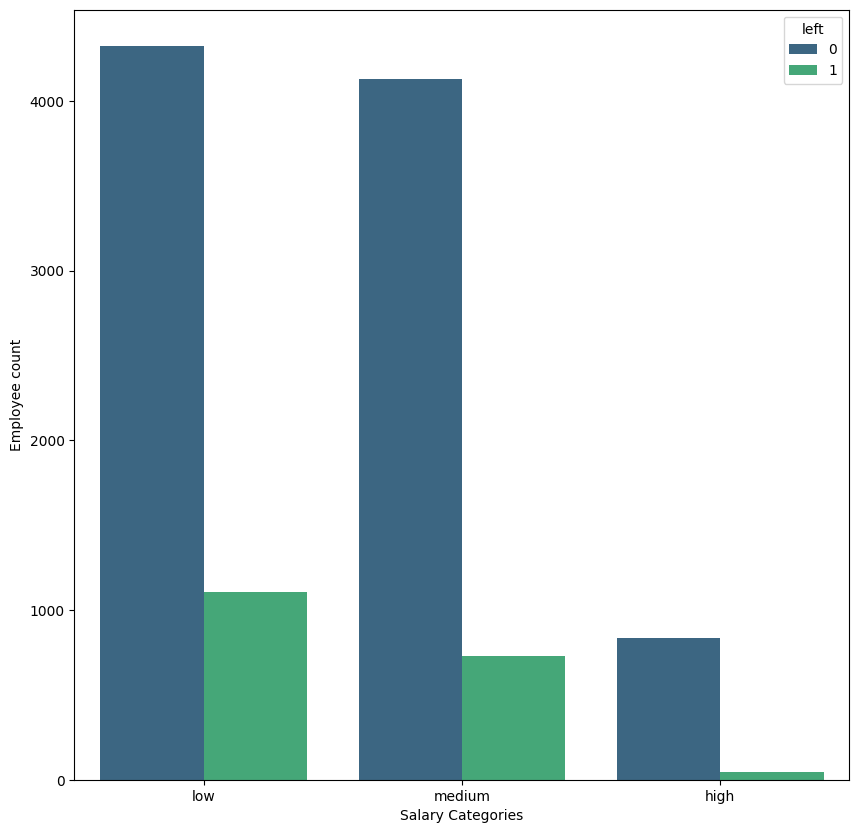

In [62]:
#EDA_1
#SALARY CATEGORIES vs EMPLOYEE COUNT

plt.figure(figsize=(10,10))
sns.countplot(x='salary', hue='left', data=empt, palette='viridis')
plt.xlabel("Salary Categories")
plt.ylabel("Employee count")
plt.show()

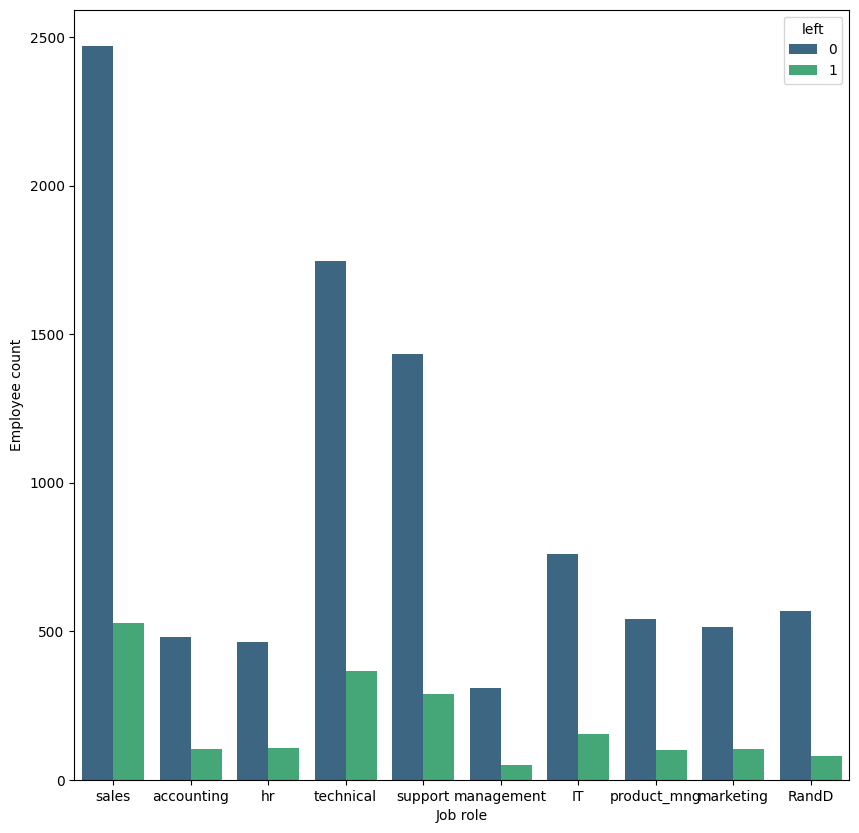

In [63]:
#JOB ROLE vs EMPLOYEE COUNT

plt.figure(figsize=(10,10))
sns.countplot(x='sales', hue='left', data=empt, palette='viridis')
plt.xlabel("Job role")
plt.ylabel("Employee count")
plt.show()

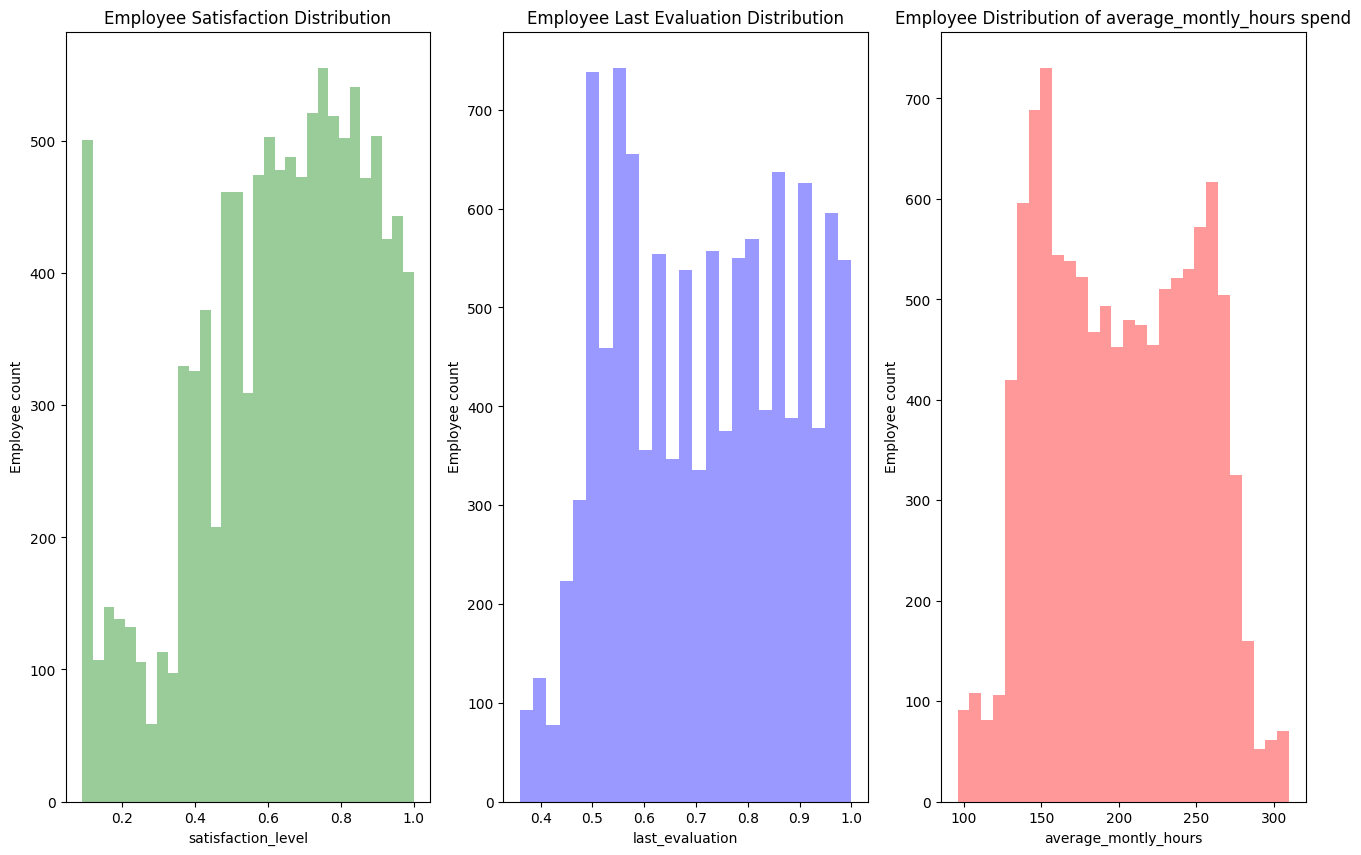

In [64]:
#DISTRIBUTION PLOT OF EMPLOYEE SATISFACTION ,EVALUATION AND MONTHLY HOURS SPEND IN COMPANY

f,axes=plt.subplots(ncols=3,figsize=(16,10))
sns.distplot(empt1.satisfaction_level,kde=False,color="g",ax=axes[0])
axes[0].set_title("Employee Satisfaction Distribution")
axes[0].set_ylabel("Employee count")

sns.distplot(empt1.last_evaluation,kde=False,color="b",ax=axes[1])
axes[1].set_title("Employee Last Evaluation Distribution")
axes[1].set_ylabel("Employee count")

sns.distplot(empt1.average_montly_hours,kde=False,color="r",ax=axes[2])
axes[2].set_title("Employee Distribution of average_montly_hours spend")
axes[2].set_ylabel("Employee count")
plt.show()

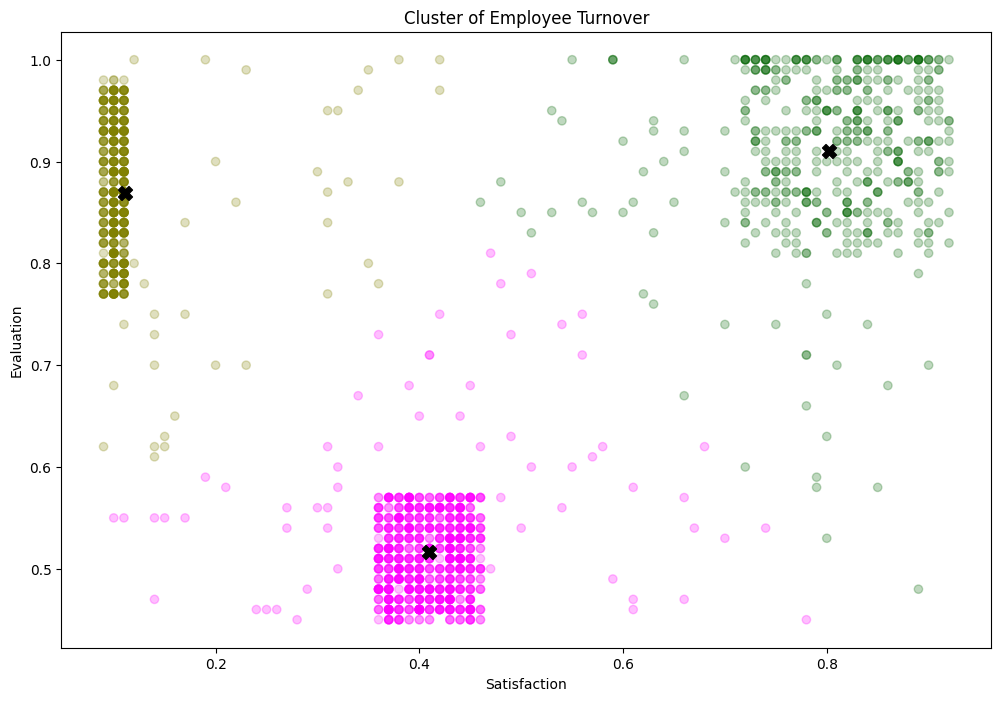

In [65]:
#EDA_2
#SSTISFACTION vs EVALUATION

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(empt1[empt1.left==1][["satisfaction_level","last_evaluation"]])
kmeans_colors=['magenta' if c==0 else 'darkgreen' if c == 2 else 'olive' for c in kmeans.labels_]
fig = plt.figure(figsize=(12,8))
plt.scatter(x="satisfaction_level", y="last_evaluation", data=empt1[empt1.left==1],alpha=0.25,color=kmeans_colors)
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.title("Cluster of Employee Turnover")
plt.show()

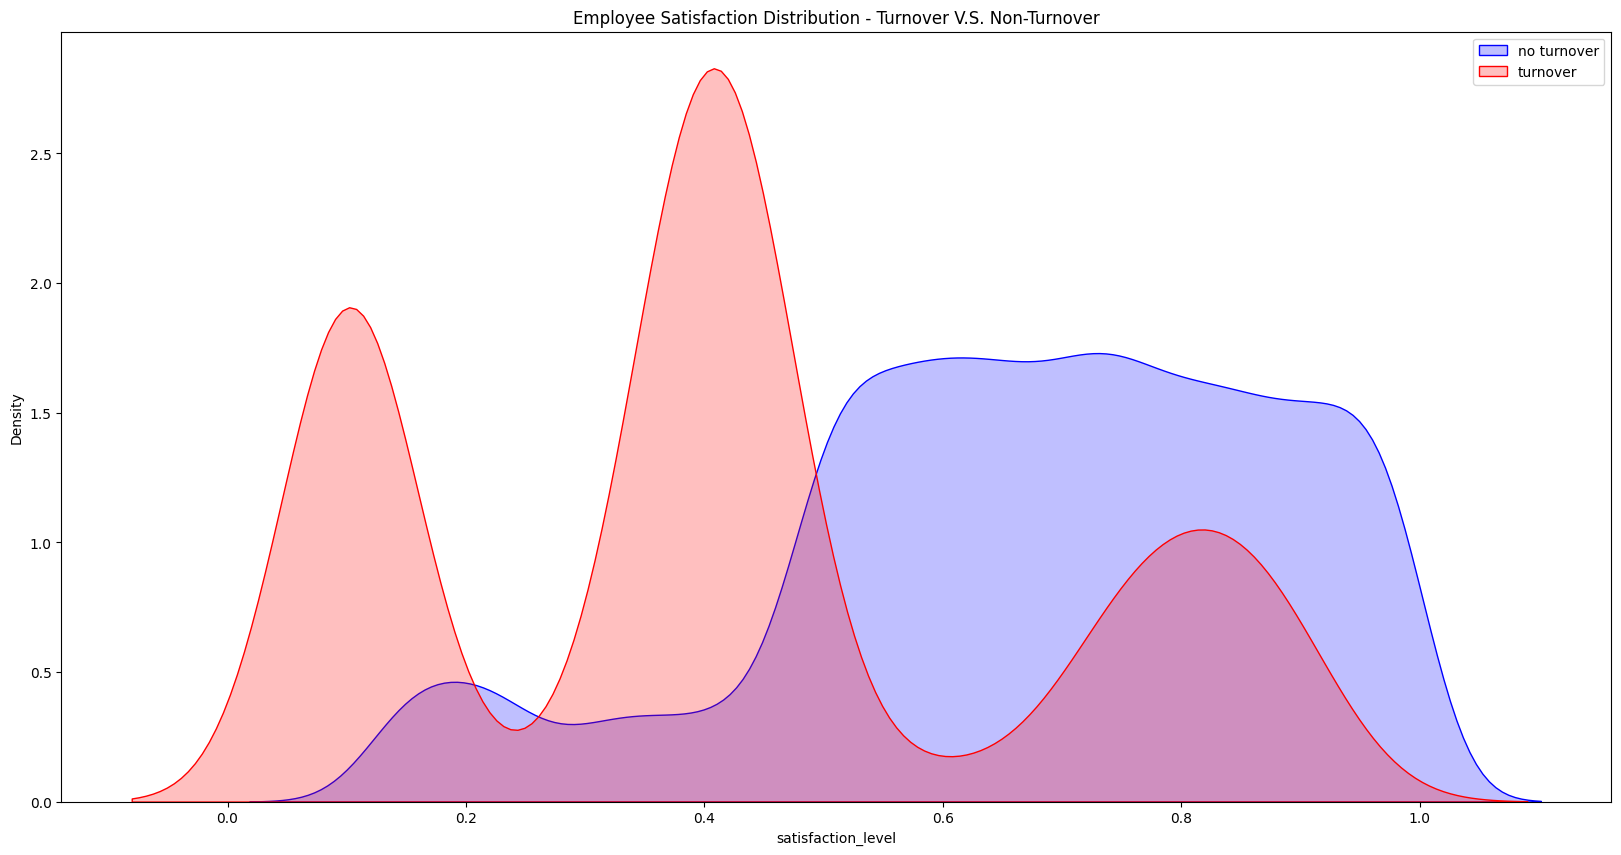

In [66]:
#KERNEL DENSTY FUNCTION

fig = plt.figure(figsize=(20,10))
ax=sns.kdeplot(empt1.loc[(empt1['left'] == 0),'satisfaction_level'] ,color='b',shade=True, label='no turnover')
ax=sns.kdeplot(empt1.loc[(empt1['left'] == 1),'satisfaction_level'] ,color='r',shade=True, label='turnover')
plt.legend()
plt.title('Employee Satisfaction Distribution - Turnover V.S. Non-Turnover');
plt.show()

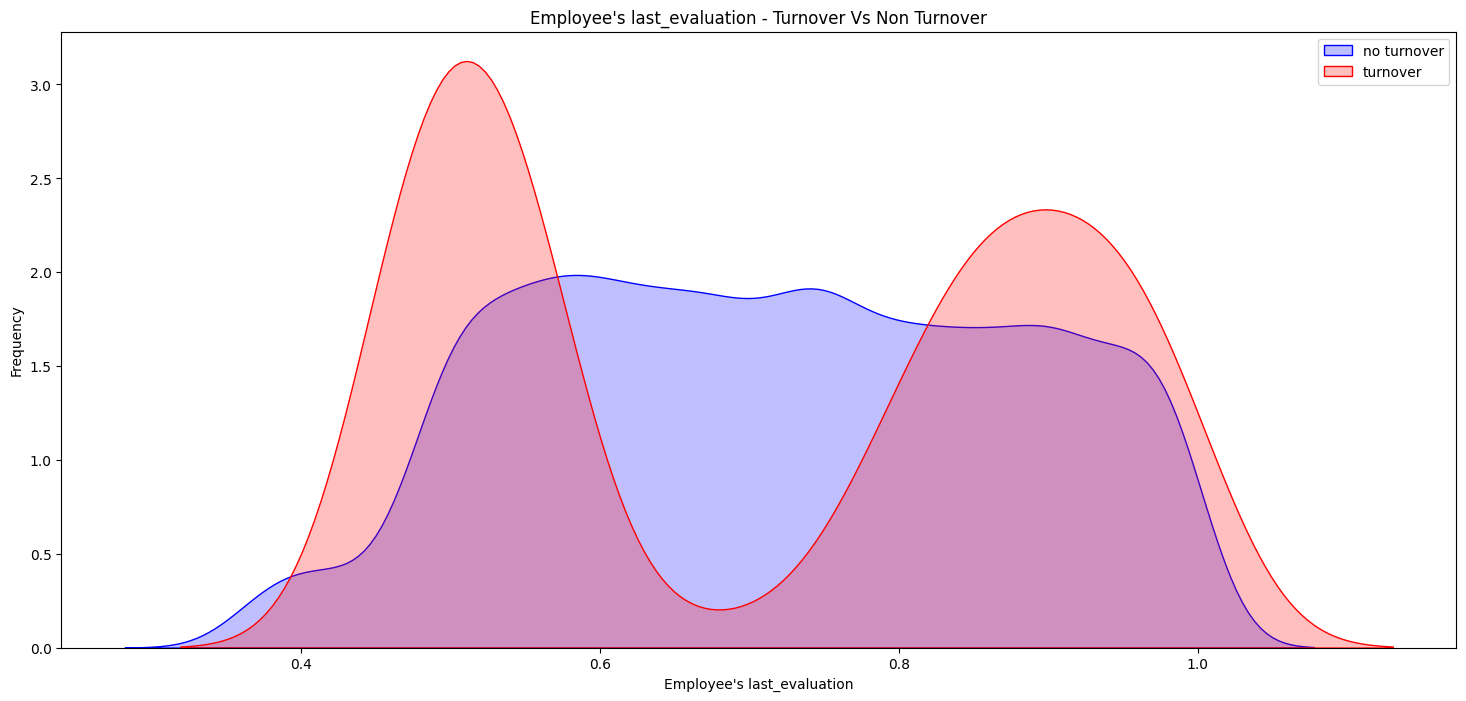

In [67]:
#KDEPlot: KERNEL DENSITY ESTIMATE PLOT

fig = plt.figure(figsize=(18, 8))
ax=sns.kdeplot(empt1.loc[(empt1['left'] == 0),'last_evaluation'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(empt1.loc[(empt1['left'] == 1),'last_evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel="Employee's last_evaluation", ylabel='Frequency')
plt.title("Employee's last_evaluation - Turnover Vs Non Turnover");
plt.legend()
plt.show()

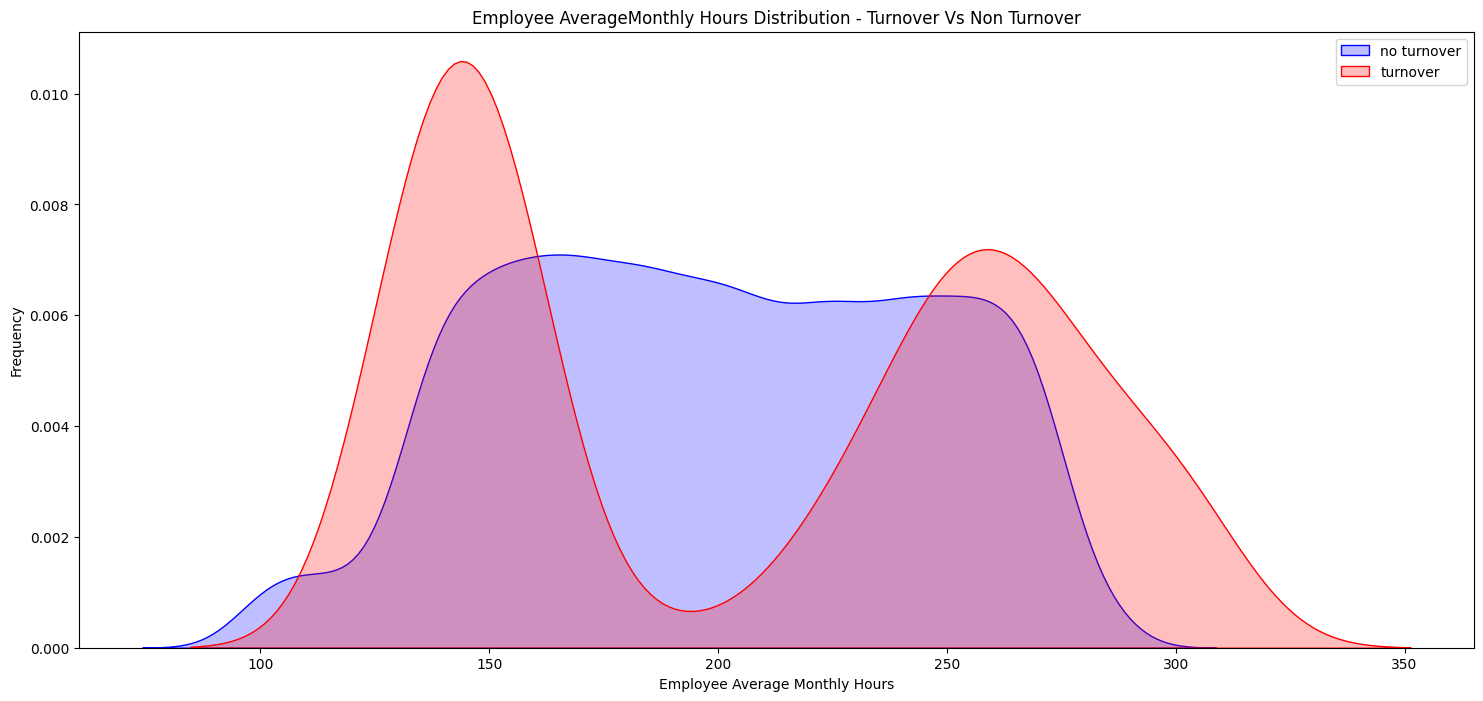

In [68]:
#KDEPlot: KERNEL DENSITY ESTIMATE PLOT

fig = plt.figure(figsize=(18, 8))
ax=sns.kdeplot(empt1.loc[(empt1['left'] == 0),'average_montly_hours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(empt1.loc[(empt1['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover Vs Non Turnover');
plt.legend()
plt.show()

[Text(0, 0.5, 'Percent')]

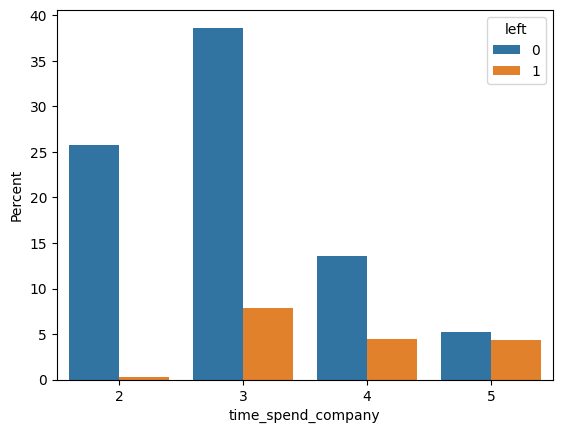

In [69]:
#Turnover V.S. Time Spend in the company
ax = sns.barplot(x="time_spend_company", y="time_spend_company",hue="left", data=empt1, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")


[Text(0, 0.5, 'Percent')]

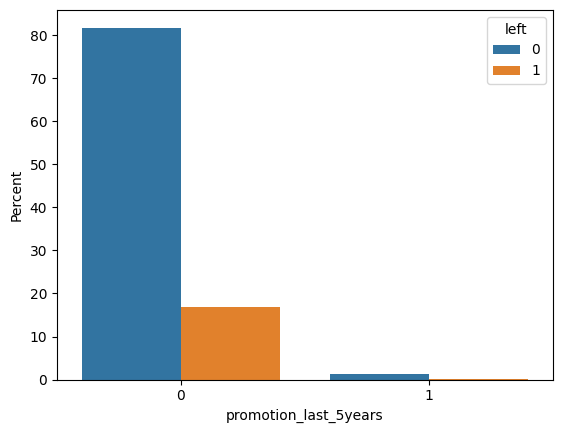

In [70]:
#Turnover V.S. promotion_last_5years
ax = sns.barplot(x="promotion_last_5years", y="promotion_last_5years",hue="left", data=empt1, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

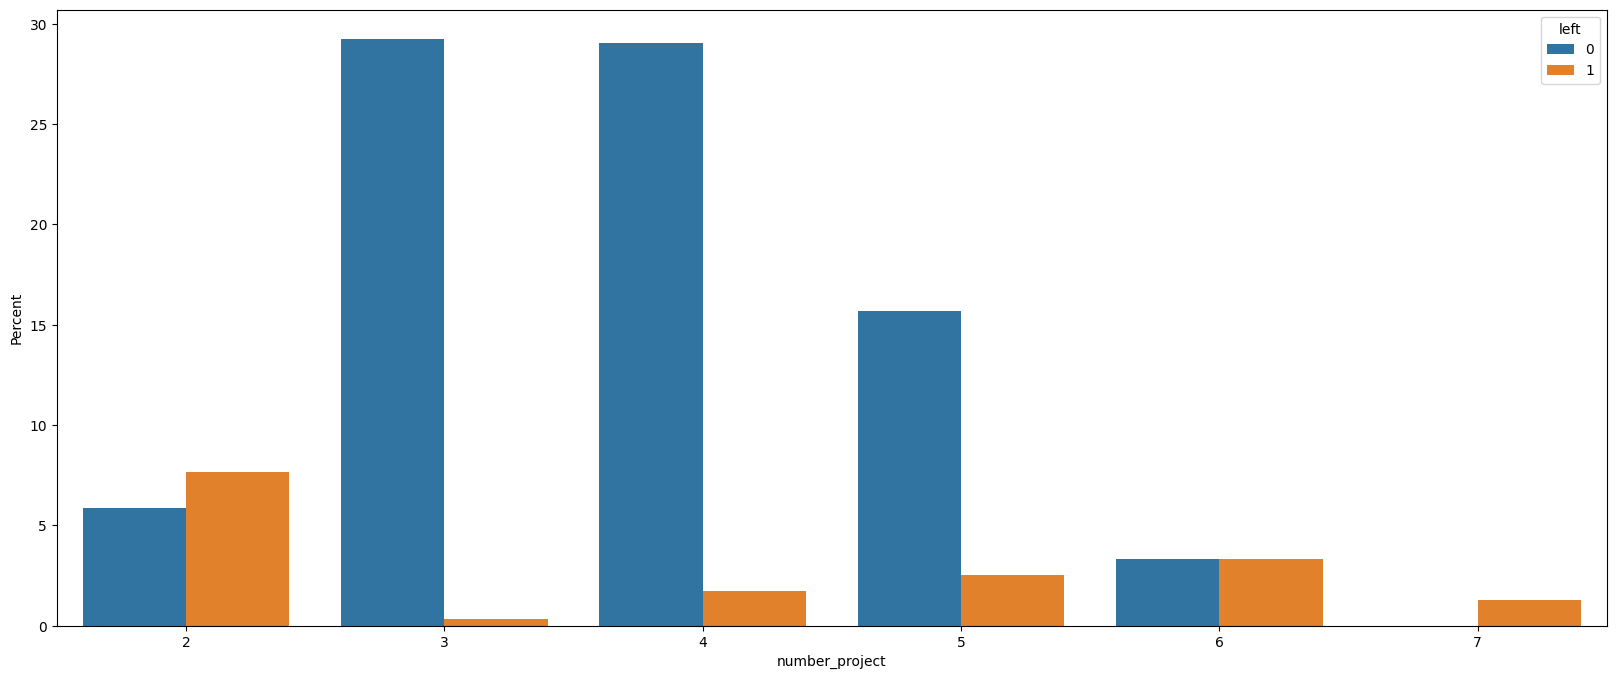

In [71]:
#PROJECT COUNT

plt.figure(figsize=(20,8))
ax = sns.barplot(x="number_project", y="number_project", hue="left", data=empt1, estimator=lambda x: len(x) / len(empt1) * 100)
ax.set(ylabel="Percent");
plt.show()

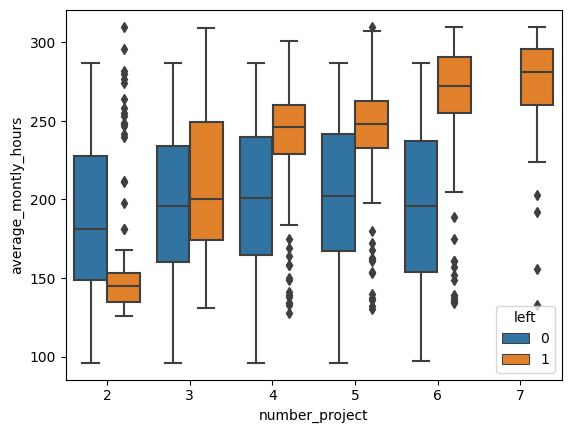

In [72]:
#ProjectCount VS AverageMonthlyHours
sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=empt1)
plt.show()

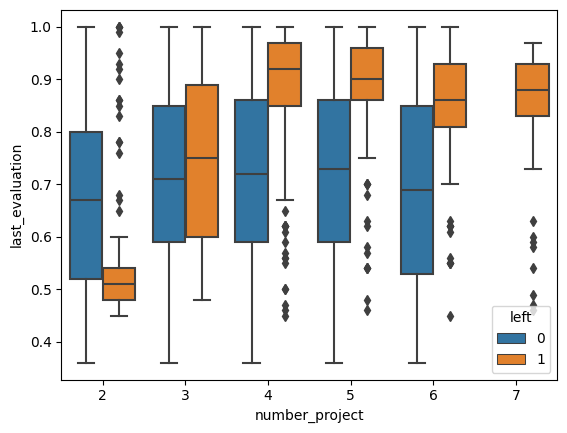

In [73]:
#ProjectCount VS Evaluation
sns.boxplot(x="number_project", y="last_evaluation", hue="left", data=empt1)
plt.show()

In [74]:
#ASSIGNING FEATURE AND TARGET TO X,y

X = empt1.drop(['left'],axis=1)
y = empt1['left']

Accuracy of LR is 0.7898658882118321
[0 0 0 ... 0 0 0]
++++++++++++++++++++++++++++++++++++++++++++++++++
               LR
Accuracy   82.27%
Precision  85.64%
Recall     94.37%
F1-score   89.79%
---------------------------------------------------------
Confusion Matrix: 
[[1742  104]
 [ 292   96]]
---------------------------------------------------------
Classification Report for LR:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1846
           1       0.48      0.25      0.33       388

    accuracy                           0.82      2234
   macro avg       0.67      0.60      0.61      2234
weighted avg       0.79      0.82      0.80      2234



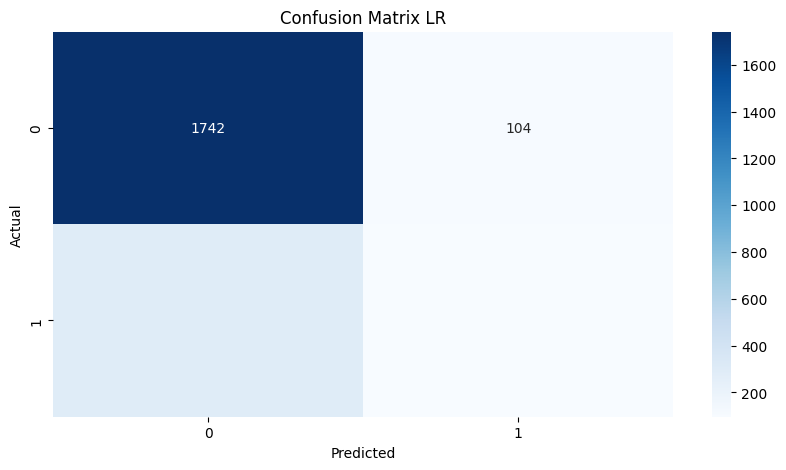

Accuracy of KNN is 0.9341888795833693
[0 0 1 ... 1 0 0]
++++++++++++++++++++++++++++++++++++++++++++++++++
              KNN
Accuracy    94.9%
Precision  97.74%
Recall     96.05%
F1-score   96.89%
---------------------------------------------------------
Confusion Matrix: 
[[1773   73]
 [  41  347]]
---------------------------------------------------------
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1846
           1       0.83      0.89      0.86       388

    accuracy                           0.95      2234
   macro avg       0.90      0.93      0.91      2234
weighted avg       0.95      0.95      0.95      2234



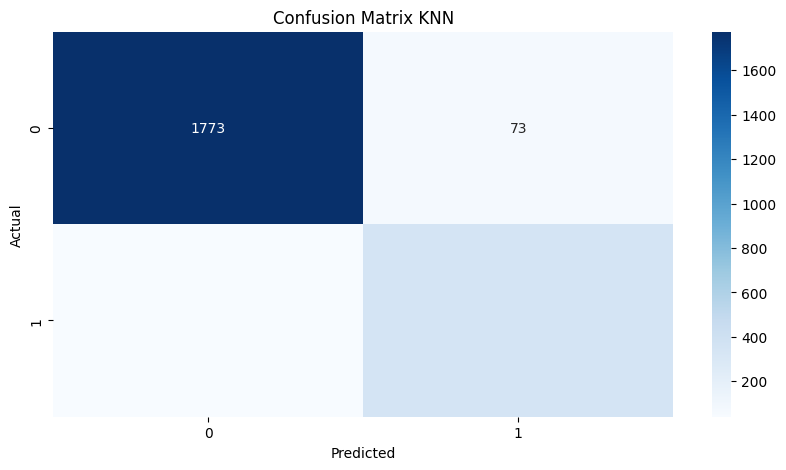

Accuracy of DT is 0.9669599509695388
[0 0 1 ... 1 0 0]
++++++++++++++++++++++++++++++++++++++++++++++++++
               DT
Accuracy   97.09%
Precision  98.63%
Recall     97.83%
F1-score   98.23%
---------------------------------------------------------
Confusion Matrix: 
[[1806   40]
 [  25  363]]
---------------------------------------------------------
Classification Report for DT:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1846
           1       0.90      0.94      0.92       388

    accuracy                           0.97      2234
   macro avg       0.94      0.96      0.95      2234
weighted avg       0.97      0.97      0.97      2234



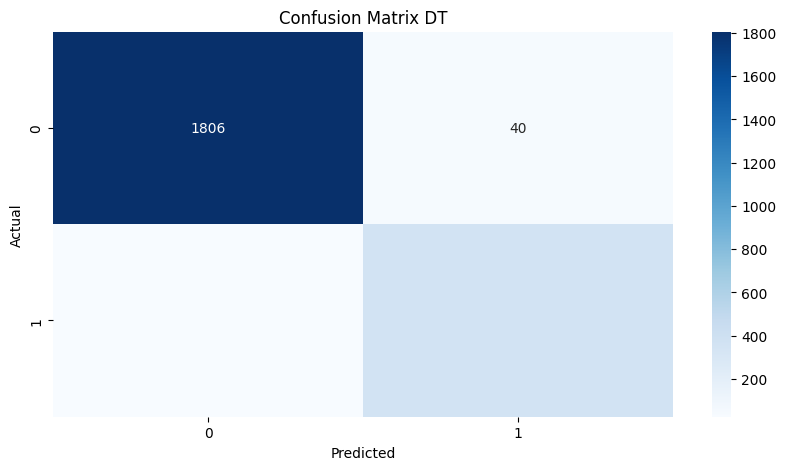

Accuracy of RFC is 0.9826315688143165
[0 0 1 ... 1 0 0]
++++++++++++++++++++++++++++++++++++++++++++++++++
              RFC
Accuracy   98.25%
Precision  98.34%
Recall     99.57%
F1-score   98.95%
---------------------------------------------------------
Confusion Matrix: 
[[1838    8]
 [  31  357]]
---------------------------------------------------------
Classification Report for RFC:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.98      0.92      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



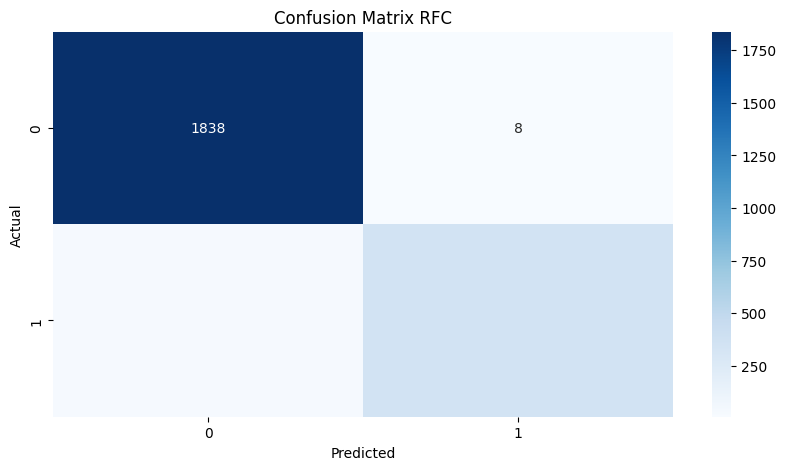

Accuracy of ABC is 0.9546055903710335
[0 0 1 ... 1 0 0]
++++++++++++++++++++++++++++++++++++++++++++++++++
              ABC
Accuracy   96.69%
Precision  97.94%
Recall     98.05%
F1-score    98.0%
---------------------------------------------------------
Confusion Matrix: 
[[1810   36]
 [  38  350]]
---------------------------------------------------------
Classification Report for ABC:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1846
           1       0.91      0.90      0.90       388

    accuracy                           0.97      2234
   macro avg       0.94      0.94      0.94      2234
weighted avg       0.97      0.97      0.97      2234



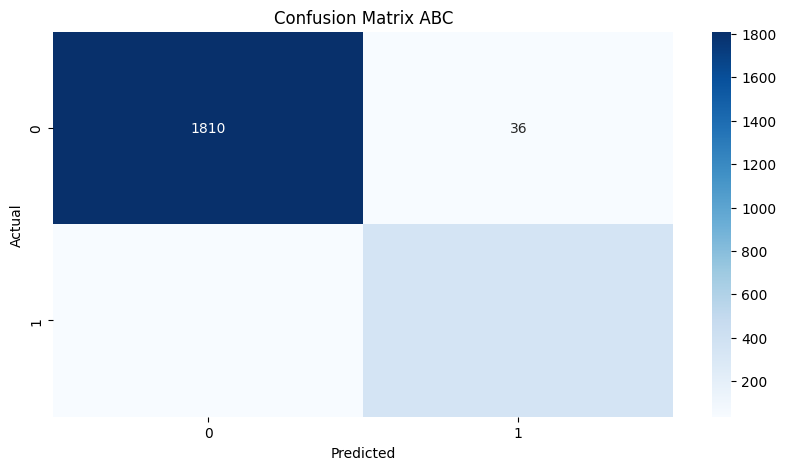

In [75]:
#MODEL COMPARISON USING VARIOUS CLASSIFICATION MODELS

models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
results=[]
names=[]
scoring='accuracy'
kfold=KFold(n_splits=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores1={}
for name,model in models:
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"Accuracy of {name} is {cv_results.mean()}")
 # Fit the classifier on the training data
    model.fit(X_train, y_train)
 # Make predictions on the test set
    y_pred = model.predict(X_test)
    print(y_pred)
 #scores[f"{name}"] = accuracy_score(y_test, y_pred)
    scores = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=0),
                                recall_score(y_test,y_pred, pos_label=0),
                                f1_score(y_test, y_pred, pos_label=0)],index=['Accuracy','Precision','Recall','F1-score'],columns = [name])
    scores1[f"{name}"] = (scores * 100).round(2).astype(str) + '%'
    print("+"*50)
    print(scores1[f"{name}"])

    print("---------------------------------------------------------")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print("---------------------------------------------------------")
 # Print the classification report for each classifier
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print("="*50)

    plt.figure(figsize=(10,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix {name}")
    plt.show()

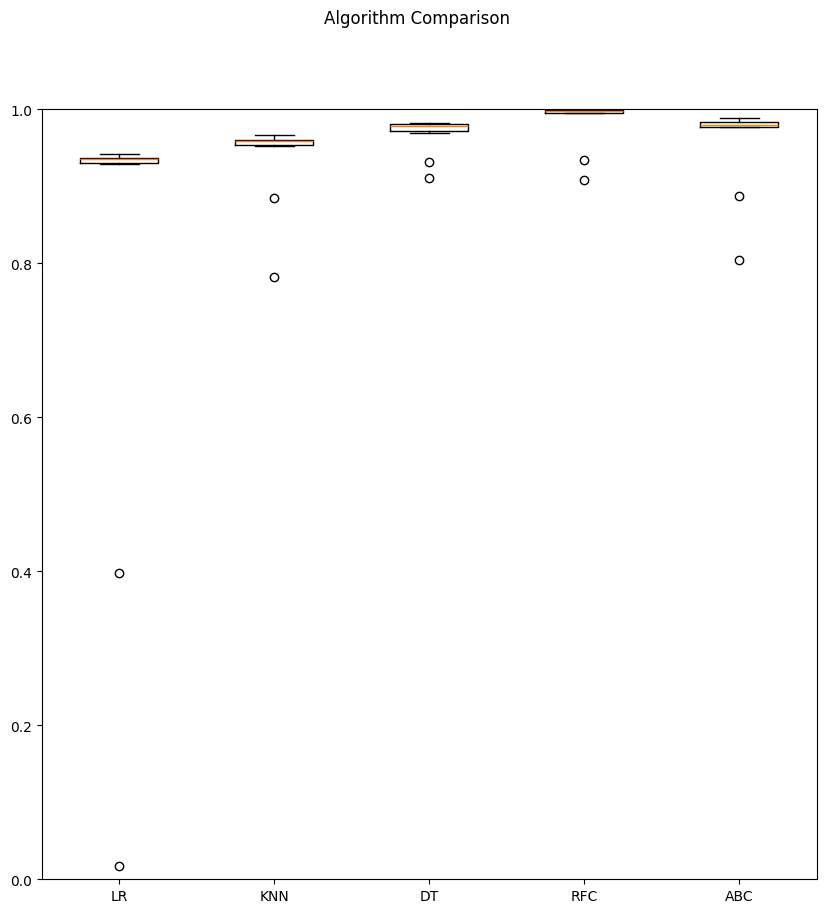

In [76]:
#BOXPLOT SHOW MODELS BASED ON THERE CORRESPONDING Accuracy_score FOR PREDICTION

fig=plt.figure(figsize=(10,10))
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylim(0, 1)
plt.show()

In [77]:
#EVALUATING WHICH MODEL IS HAVING HIGH F1-Score

res1 = pd.concat([scores1['LR'],scores1['KNN'],scores1['DT'],scores1['RFC'],scores1['ABC']], axis=1)
print(res1)

               LR     KNN      DT     RFC     ABC
Accuracy   82.27%   94.9%  97.09%  98.25%  96.69%
Precision  85.64%  97.74%  98.63%  98.34%  97.94%
Recall     94.37%  96.05%  97.83%  99.57%  98.05%
F1-score   89.79%  96.89%  98.23%  98.95%   98.0%


In [78]:
# SORT THE DATAFRAME IN DESCENDING ORDER BASED ON F1-score (class 1) VALUES

f1_score_row=res1.sort_values(by='F1-score',axis=1, ascending=False).loc['F1-score']
print(f1_score_row)

RFC    98.95%
DT     98.23%
ABC     98.0%
KNN    96.89%
LR     89.79%
Name: F1-score, dtype: object


F1-score is best for : RFC  with the % score of  98.95%


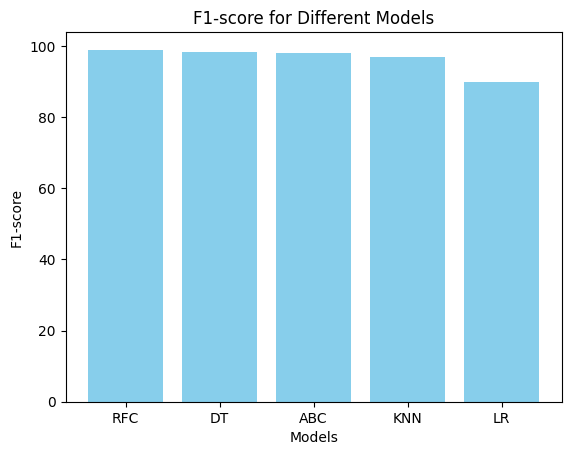

In [79]:
# BAR GRAPH SHOWING F1-score FOR CLASS '1' (canceled) OF ALL PREVIOUSLY EVALUATED CLASSIFIERS

f1_scores = f1_score_row.str.strip('%').astype(float)
print("F1-score is best for :",f1_scores.idxmax()," with the % score of ",max(f1_score_row))
plt.bar(f1_scores.index, f1_scores.values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score for Different Models')
plt.show()

In [80]:
# CREATE A RANDOM FOREST CLASSIFIER

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [81]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# MAKE PREDICTION

y_pred = rf_classifier.predict(X_test)
print(y_pred)

[0 0 1 ... 1 0 0]


In [83]:
print(X_test)

       satisfaction_level  last_evaluation  number_project  \
3830                 0.83             0.73               5   
7180                 0.52             0.74               4   
988                  0.74             0.89               5   
157                  0.11             0.92               6   
11854                0.70             0.93               3   
...                   ...              ...             ...   
7163                 0.85             0.76               4   
5322                 0.36             0.71               3   
801                  0.43             0.55               2   
4958                 0.61             0.70               4   
5806                 1.00             0.71               4   

       average_montly_hours  time_spend_company  Work_accident  \
3830                    136                   3              0   
7180                    174                   3              0   
988                     259                   5          

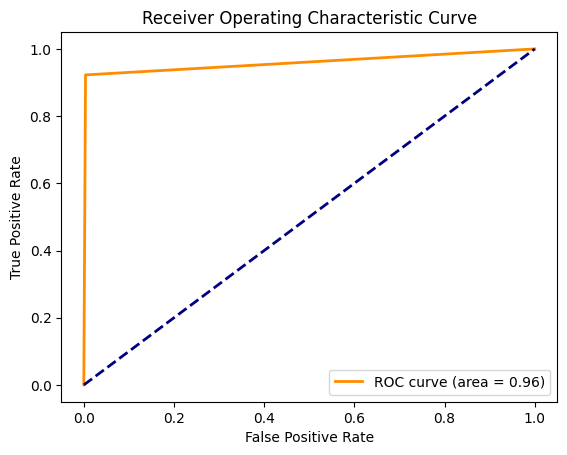

In [84]:
#ROC_CURVE

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()